In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import hist
import mplhep as hep

In [2]:
f=uproot.open("/home/submit/chowb/fccee/FCCAnalyzer/tmp/output_xsec_example.root")

In [3]:
f.keys()

['p8_ee_Zmumu_ecm91;1',
 'p8_ee_Zmumu_ecm91/leps_all_p;1',
 'p8_ee_Zmumu_ecm91/leps_all_theta;1',
 'p8_ee_Zmumu_ecm91/leps_all_phi;1',
 'p8_ee_Zmumu_ecm91/leps_all_q;1',
 'p8_ee_Zmumu_ecm91/leps_all_no;1',
 'p8_ee_Zmumu_ecm91/m_inv;1',
 'p8_ee_Zmumu_ecm91/emiss;1',
 'p8_ee_Zmumu_ecm91/meta;1',
 'p8_ee_Ztautau_ecm91;1',
 'p8_ee_Ztautau_ecm91/leps_all_p;1',
 'p8_ee_Ztautau_ecm91/leps_all_theta;1',
 'p8_ee_Ztautau_ecm91/leps_all_phi;1',
 'p8_ee_Ztautau_ecm91/leps_all_q;1',
 'p8_ee_Ztautau_ecm91/leps_all_no;1',
 'p8_ee_Ztautau_ecm91/m_inv;1',
 'p8_ee_Ztautau_ecm91/emiss;1',
 'p8_ee_Ztautau_ecm91/meta;1']

200334121185.60004


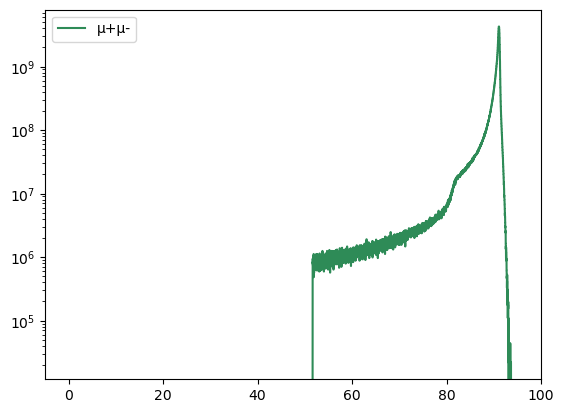

In [4]:
h = f['p8_ee_Zmumu_ecm91/m_inv;1']

y1,x = h.to_numpy()
plt.plot(x[:-1],y1, color='seagreen', drawstyle='steps-mid', label='μ+μ-')
integral = sum(y1)
print(integral)


plt.xlim(-5,100)
plt.yscale("log")
plt.legend()

621182440.2000043


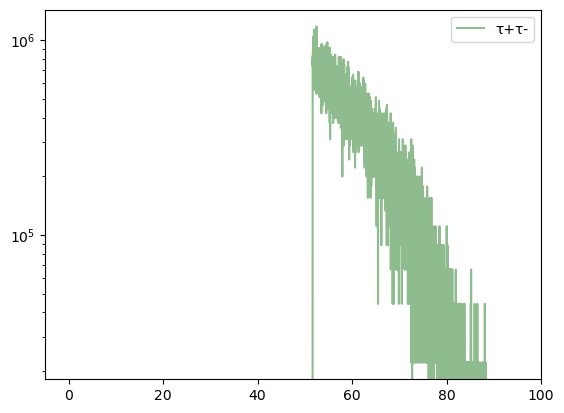

In [5]:
h = f['p8_ee_Ztautau_ecm91/m_inv;1']

y2,x = h.to_numpy()

plt.plot(x[:-1],y2, color='darkseagreen', drawstyle='steps-mid', label='τ+τ-')
integral = sum(y2)
print(integral)

plt.xlim(-5,100)
plt.yscale("log")
plt.legend()

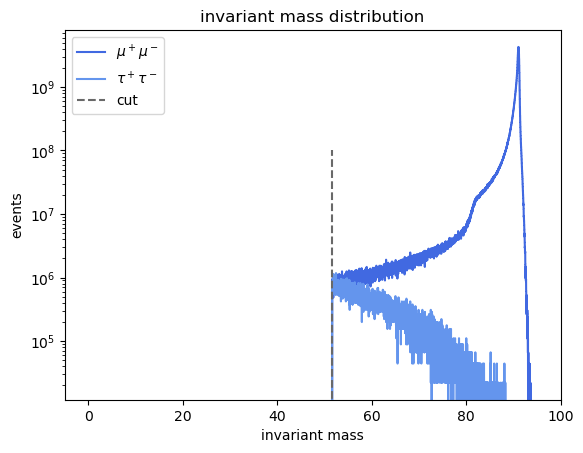

In [6]:
plt.plot(x[:-1],y1, color='royalblue', drawstyle='steps-mid', label="$μ^+μ^-$")
plt.plot(x[:-1],y2, color='cornflowerblue', drawstyle='steps-mid', label="$τ^+τ^-$")

plt.xlim(-5,100)
plt.yscale("log")
plt.plot([51.652499999999996,51.652499999999996],[0,1e8], color='dimgrey', linestyle='dashed', label='cut')
plt.title("invariant mass distribution")
plt.ylabel("events")
plt.xlabel("invariant mass")
plt.legend()

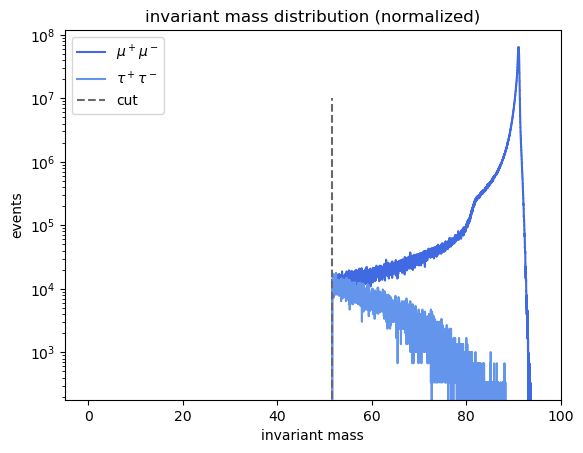

In [7]:
w1 = 1462.08*103/10000000
w2 = 1476.58*103/10000000

plt.plot(x[:-1],y1*w1, color='royalblue', drawstyle='steps-mid', label="$μ^+μ^-$")
plt.plot(x[:-1],y2*w2, color='cornflowerblue', drawstyle='steps-mid', label="$τ^+τ^-$")

plt.xlim(-5,100)
plt.yscale("log")
plt.plot([51.652499999999996,51.652499999999996],[0,1e7], color='dimgrey', linestyle='dashed', label='cut')
plt.title("invariant mass distribution (normalized)")
plt.ylabel("events")
plt.xlabel("invariant mass")
plt.legend()

In [8]:
h_mumu = f['p8_ee_Zmumu_ecm91/m_inv;1'].to_hist()*w1
x = h_mumu.axes[0].centers

h_tautau = f['p8_ee_Ztautau_ecm91/m_inv;1'].to_hist()*w2
x = h_tautau.axes[0].centers

ratio_list = []

for i in x:
    integral = h_mumu[i*1.0j:].sum()
    integral2 = h_tautau[i*1.0j:].sum()
    ratio = integral.value/(np.sqrt(integral.value+integral2.value))
    ratio_list.append(ratio)

/tmp/ipykernel_3847028/353014161.py:12: RuntimeWarning: invalid value encountered in scalar divide
  ratio = integral.value/(np.sqrt(integral.value+integral2.value))


52.0125 54840.670932676556


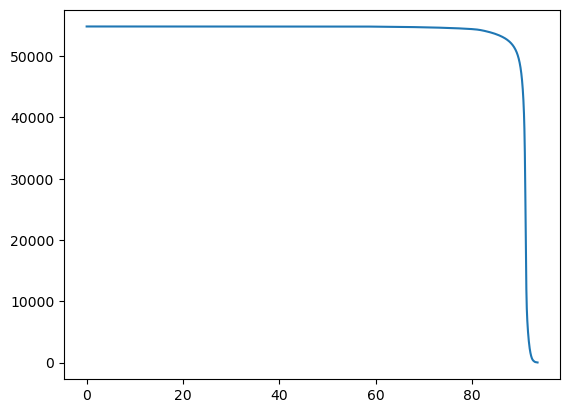

In [9]:
plt.plot(x,ratio_list)

max_y = max(ratio_list)
max_x = x[ratio_list.index(max_y)]
print(max_x, max_y)